In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python3 (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/lisandro/Documents/mt/tp3
-- Configuring done
-- Generating done
-- Build files have b

In [83]:
import metnum as mt

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import util

In [7]:
df = pd.read_csv('../data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

Text(0, 0.5, 'Precio')

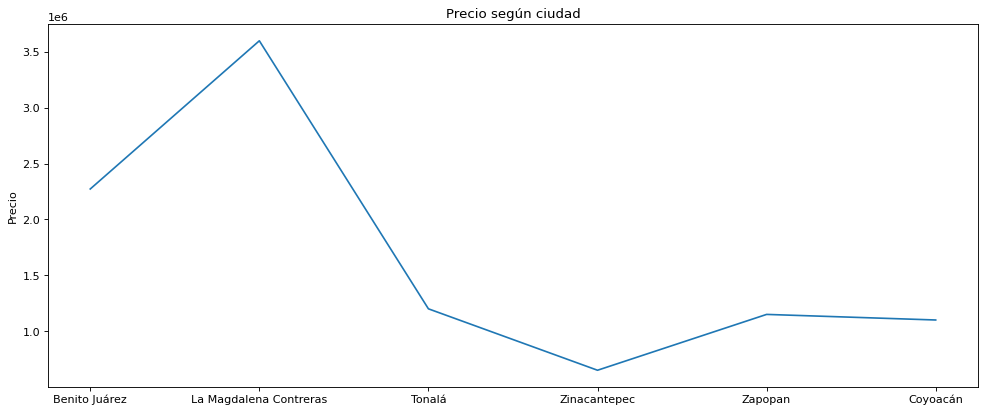

In [57]:
df = pd.read_csv('../data/train.csv')

df = df[0:6]

df = df[['ciudad','precio']].dropna()

x = df['ciudad'].to_list()

a = df['precio'].to_list()

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,a)
plt.title('Precio según ciudad')
plt.ylabel('Precio')



In [36]:
%%time 
#Encontrar las ciudades que mejor explican su precio en base ...

df = pd.read_csv('../data/train.csv')

lista_ciudades = df['ciudad'].unique().tolist()



CPU times: user 1.33 s, sys: 32 ms, total: 1.36 s
Wall time: 1.36 s


In [99]:
df = pd.read_csv('../data/train.csv')

ciudad = str(lista_ciudades[2])

df1 = df[df['ciudad'] == ciudad]

df1 = df1[['antiguedad','habitaciones','garages','banos','gimnasio','usosmultiples','centroscomercialescercanos','precio']].dropna()

x = df1[['antiguedad','habitaciones','garages','banos','gimnasio','usosmultiples','centroscomercialescercanos']].values
x.reshape(len(x_train),7)

y = df1[['precio']].values
y.reshape(len(y_train),1)

limit = int(0.85 * len(df1))

x_train = x[0:limit]

linreg = mt.LinearRegression()
linreg.fit(x_train, y_train)






ValueError: cannot reshape array of size 4480 into shape (544,7)